<a href="https://colab.research.google.com/github/Jpsama1236/ML_algorithms/blob/main/Kmeans_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import plotly.express as px
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import random

In [49]:
#main kmeans class

class Kmeans:
  def __init__(self,n_clusters=2,max_iter=100):
    self.n_clusters=n_clusters
    self.max_iter=max_iter
    self.centroids=None

  def fit_predict(self,X):
    #assign random indices initially for centroids
    indices=random.sample(range(0,X.shape[0]),self.n_clusters)
    self.centroids=X[indices]

    for i in range(self.max_iter):
      #assigning each datapoint in X to a cluster centroid
      cluster_group=self.assign_cluster(X)
      old_centroids=self.centroids

      #moving centroids
      self.centroids=self.move_centroids(X,cluster_group)

      #checking and when to break loop
      if(old_centroids==self.centroids).all():
        sum1=0
        for i in range(X.shape[0]):
          var=cluster_group[i]
          sum1+=np.dot(X[i]-self.centroids[var],X[i]-self.centroids[var])
        break
    return (sum1,cluster_group)


  def assign_cluster(self,X):
    distances=[]
    cluster_group=[]
    for row in X:
      for centroid in self.centroids:
        distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
      min_distance=min(distances)
      min_index=distances.index(min_distance)
      cluster_group.append(min_index)
      distances.clear()
    return np.array(cluster_group)

  def move_centroids(self,X,cluster_group):
    new_centroids=[]

    cluster_type=np.unique(cluster_group)

    for type in cluster_type:
      new_centroids.append(X[cluster_group == type].mean(axis=0))
    return np.array(new_centroids)

In [7]:
centroids = [(-5,-5),(5,5),(-2.5,2.5)]
cluster_std = [1,1,1]


In [8]:
X,y=make_blobs(n_samples=100 , centers=centroids,cluster_std=cluster_std,n_features=2,random_state=43)

In [9]:
X.shape

(100, 2)

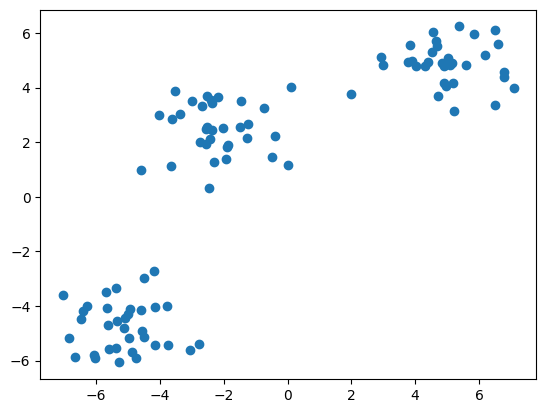

In [10]:
plt.scatter(X[:,0],X[:,1])

In [50]:
km=Kmeans(n_clusters=3,max_iter=200)
wcss,y_means=km.fit_predict(X)

In [61]:
wcss = []

for i in range(1,11):
    km = Kmeans(n_clusters=i)
    wc,y_means=km.fit_predict(X)
    wcss.append(wc)

In [62]:
wcss

[11701.829838911815,
 4913.991235388608,
 588.852720121213,
 551.9881857467683,
 526.4945706330843,
 435.92469452421597,
 433.69029244537995,
 400.25849110673624,
 363.240191251191,
 375.59440830834615]

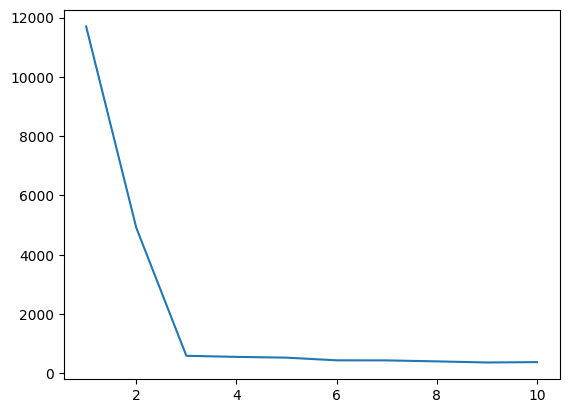

In [63]:
plt.plot(range(1,11),wcss)

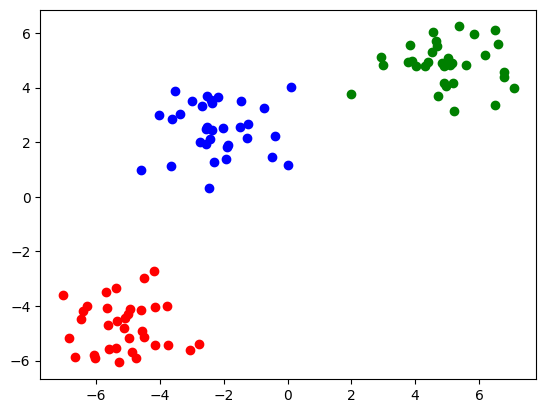

In [30]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],color='red')
plt.scatter(X[y_means==1,0],X[y_means==1,1],color='green')
plt.scatter(X[y_means==2,0],X[y_means==2,1],color='blue')
plt.show()

For 3D data

In [42]:
from sklearn.datasets import make_blobs

centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4)]
cluster_std = [1,1,1]

X,y = make_blobs(n_samples=200,cluster_std=cluster_std,centers=centroids,n_features=3,random_state=1)

In [43]:
X.shape

(200, 3)

In [44]:
km=Kmeans(n_clusters=3,max_iter=200)
y_means=km.fit_predict(X)

In [46]:
import pandas as pd
df = pd.DataFrame()

df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = y_means

In [47]:
fig = px.scatter_3d(df,x='col1', y='col2', z='col3',color='label')
fig.show()